In [3]:
from environment_configuration import *

# Import packages
import pickle
import pandas as pd
from pathlib import Path
import gc

Script: 01.01.02 [Import Packages] completed
Script: 01.01.03 [Update Data Paths] completed
Script: 01.01.04 [Define Other Global Variables] completed


In [4]:
from clean_data_load import *

Script: 05.00.02 [Import Packages] completed
Script: 05.01.01 [Load Cleaned Product Data] completed
Script: 05.02.01 [Load One Hot Encoded Product Data] completed


In [5]:
products_clean.head()

,asin,description,title,category2_t,category3_t,category4_t,category5_t,category6_t,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating,electronicsRankBin
0,0528881469,"Like its award-winning predecessor, the Intell...",Rand McNally 528881469 7-inch Intelliroute TND...,GPS & Navigation,Vehicle GPS,Trucking GPS,Unknown,Unknown,1,299.99,0,0,5.0,2.400000,0.400000,0.200000,0.200000,0.000000,0.200000,Unknown
1,0594451647,HDTV Adapter Kit for NOOK HD and NOOK HD+\nThi...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Computers & Accessories,Touch Screen Tablet Accessories,Chargers & Adapters,Unknown,Unknown,1,49.95,0,0,5.0,4.200000,0.000000,0.200000,0.000000,0.200000,0.600000,Unknown
2,0594481813,Power up your device with this Barnes &amp; No...,Barnes &amp; Noble OV/HB-ADP Universal Power Kit,eBook Readers & Accessories,Power Adapters,Unknown,Unknown,Unknown,1,19.65,0,0,8.0,4.000000,0.000000,0.000000,0.375000,0.250000,0.375000,Unknown
3,0972683275,The VideoSecu TV mount is a mounting solution ...,VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,Accessories & Supplies,Audio & Video Accessories,TV Accessories & Parts,TV Ceiling & Wall Mounts,Unknown,1,29.99,1,10,219.0,4.461187,0.027397,0.013699,0.082192,0.223744,0.652968,Unknown
4,1400532620,Barnes & Noble Nook eReader - no 3GMeet nook. ...,Barnes &amp; Noble Nook eReader - no 3G,eBook Readers & Accessories,Unknown,Unknown,Unknown,Unknown,1,74.95,1,5,41.0,3.609756,0.219512,0.048780,0.048780,0.268293,0.414634,50thPercentile


In [6]:
products_prep = products_clean[['asin', 'hasDescription', 'price_t',
          'containsAnySalesRank','numberQuestions','numberReviews',
          'meanStarRating','star1Rating','star2Rating','star3Rating','star4Rating','star5Rating']]
products_prep.head()

,asin,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating
0,0528881469,1,299.99,0,0,5.0,2.400000,0.400000,0.200000,0.200000,0.000000,0.200000
1,0594451647,1,49.95,0,0,5.0,4.200000,0.000000,0.200000,0.000000,0.200000,0.600000
2,0594481813,1,19.65,0,0,8.0,4.000000,0.000000,0.000000,0.375000,0.250000,0.375000
3,0972683275,1,29.99,1,10,219.0,4.461187,0.027397,0.013699,0.082192,0.223744,0.652968
4,1400532620,1,74.95,1,5,41.0,3.609756,0.219512,0.048780,0.048780,0.268293,0.414634


In [7]:
from data_load import *

Script: 02.00.02 [Import Packages] completed
Script: 02.01.01 [Load Reviews Data] completed
Script: 02.01.02 [Verify Data Load] skipped
Script: 02.01.03 [Load Product Metadata Data] completed
Script: 02.01.04 [Verify Reviews Data] skipped
Script: 02.01.05 [Load QA Data] completed
Script: 02.01.05 [Verify QA Data] skipped


In [8]:
reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [9]:
reviews_prep = reviews_df[['reviewerID','asin','helpful','overall','unixReviewTime']]

In [10]:
reviews_prep

,reviewerID,asin,helpful,overall,unixReviewTime
0,AO94DHGC771SJ,0528881469,"[0, 0]",5.0,1370131200
1,AMO214LNFCEI4,0528881469,"[12, 15]",1.0,1290643200
2,A3N7T0DY83Y4IG,0528881469,"[43, 45]",3.0,1283990400
3,A1H8PY3QHMQQA0,0528881469,"[9, 10]",2.0,1290556800
4,A24EV6RXELQZ63,0528881469,"[0, 0]",1.0,1317254400
...,...,...,...,...,...
1689183,A34BZM6S9L7QI4,B00LGQ6HL8,"[1, 1]",5.0,1405555200
1689184,A1G650TTTHEAL5,B00LGQ6HL8,"[0, 0]",5.0,1405382400
1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,"[0, 0]",5.0,1405555200
1689186,A1E1LEVQ9VQNK,B00LGQ6HL8,"[0, 0]",5.0,1405641600


In [13]:
#create help metric variables
reviews_prep.loc[:,'help_ratio']=reviews_prep['helpful'].apply(lambda x: (x[0]+1)/(x[1]+1))
reviews_prep.loc[:,'help_count']=reviews_prep['helpful'].apply(lambda x: x[0]+x[1])

In [14]:
#zero out ratios with no counts due to +1 above
reviews_prep.loc[reviews_prep.help_count==0,'help_ratio'] = 0.0

### Compare dataframe to create user/product matrix

In [15]:
#number of total reviews
reviews_prep.asin.nunique()

63001

In [16]:
products_prep.asin.unique()

array(['0528881469', '0594451647', '0594481813', ..., 'B00L21HC7A',
       'B00L3YHF6O', 'B00LGQ6HL8'], dtype=object)

##### 11 different

In [17]:
merged = pd.merge(reviews_prep, products_prep, how='inner', on='asin')

In [18]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688775 entries, 0 to 1688774
Data columns (total 18 columns):
reviewerID              1688775 non-null object
asin                    1688775 non-null object
helpful                 1688775 non-null object
overall                 1688775 non-null float64
unixReviewTime          1688775 non-null int64
help_ratio              1688775 non-null float64
help_count              1688775 non-null int64
hasDescription          1688775 non-null int32
price_t                 1688775 non-null float64
containsAnySalesRank    1688775 non-null int32
numberQuestions         1688775 non-null int32
numberReviews           1688775 non-null float64
meanStarRating          1688775 non-null float64
star1Rating             1688775 non-null float64
star2Rating             1688775 non-null float64
star3Rating             1688775 non-null float64
star4Rating             1688775 non-null float64
star5Rating             1688775 non-null float64
dtypes: float64(10

In [19]:
merged.drop(['helpful'], axis=1, inplace=True)

In [21]:
#missing products
merged[merged.hasDescription.isna() == True]['asin'].unique()

array([], dtype=object)

In [22]:
products_prep[products_prep.asin.isin(merged[merged.hasDescription.isna() == True]['asin'].unique())]

,asin,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating


In [23]:
#check partial
products_prep[products_prep.asin.astype(str).str.contains('JD3')]

,asin,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating
123,B00000JD34,1,22.49,1,10,21.0,3.952381,0.047619,0.095238,0.095238,0.380952,0.380952
124,B00000JD3C,1,11.30,1,0,6.0,4.000000,0.166667,0.000000,0.000000,0.333333,0.500000
8379,B000EUJD3Q,1,295.00,1,0,11.0,3.818182,0.090909,0.000000,0.181818,0.454545,0.272727
8381,B000EUJD3G,1,250.00,1,0,11.0,3.818182,0.000000,0.090909,0.272727,0.363636,0.272727
19019,B001JD3R7U,1,26.99,0,6,38.0,4.342105,0.026316,0.000000,0.105263,0.342105,0.526316
28926,B003DQJD3S,1,17.90,1,0,8.0,4.000000,0.000000,0.250000,0.000000,0.250000,0.500000
40225,B0054JD3DS,1,2.99,0,0,6.0,4.166667,0.166667,0.000000,0.000000,0.166667,0.666667
45457,B006JD3F0Y,0,8.99,0,0,88.0,4.636364,0.000000,0.022727,0.068182,0.159091,0.750000
62618,B00IJD3QTC,1,269.99,0,10,18.0,4.666667,0.055556,0.000000,0.000000,0.111111,0.833333


In [24]:
merged.head()

,reviewerID,asin,overall,unixReviewTime,help_ratio,help_count,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating
0,AO94DHGC771SJ,0528881469,5.0,1370131200,0.000000,0,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
1,AMO214LNFCEI4,0528881469,1.0,1290643200,0.812500,27,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
2,A3N7T0DY83Y4IG,0528881469,3.0,1283990400,0.956522,88,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
3,A1H8PY3QHMQQA0,0528881469,2.0,1290556800,0.909091,19,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
4,A24EV6RXELQZ63,0528881469,1.0,1317254400,0.000000,0,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2


In [25]:
merged.iloc[:,3:]

,unixReviewTime,help_ratio,help_count,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating
0,1370131200,0.000000,0,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
1,1290643200,0.812500,27,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
2,1283990400,0.956522,88,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
3,1290556800,0.909091,19,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
4,1317254400,0.000000,0,1,299.99,0,0,5.0,2.4,0.4,0.2,0.2,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688770,1405555200,1.000000,2,1,99.50,0,0,5.0,5.0,0.0,0.0,0.0,0.0,1.0
1688771,1405382400,0.000000,0,1,99.50,0,0,5.0,5.0,0.0,0.0,0.0,0.0,1.0
1688772,1405555200,0.000000,0,1,99.50,0,0,5.0,5.0,0.0,0.0,0.0,0.0,1.0
1688773,1405641600,0.000000,0,1,99.50,0,0,5.0,5.0,0.0,0.0,0.0,0.0,1.0


In [26]:
with open(Path(working_directory + data_path + '/reviews_meta_combined_aggregated.pkl'), 'rb') as pickle_file:
    rev_meta_agg_df = pickle.load(pickle_file)
    rev_meta_agg_df = pd.DataFrame(rev_meta_agg_df)

In [27]:
rev_meta_agg_df.head()

,reviewerID,MaxRating,MinRating,NumberOfRatings,AverageRating,MedianRating,SummedRatings,MaxPrice,MinPrice,AveragePrice,MedianPrice,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews
0,A000715434M800HLCENK9,5.0,1.0,5.0,3.200000,3.0,16.0,95.18,11.99,46.110000,25.99,230.55,1,1,0.0,0.0,0.000000,0.0,0.0
1,A00101847G3FJTWYGNQA,5.0,4.0,6.0,4.666667,5.0,28.0,109.98,8.99,51.293333,42.96,307.76,2,3,52.0,0.0,12.000000,0.0,72.0
2,A00166281YWM98A3SVD55,5.0,4.0,5.0,4.800000,5.0,24.0,199.00,9.83,95.150000,99.98,475.75,6,6,51.0,0.0,10.200000,0.0,51.0
3,A0046696382DWIPVIWO0K,5.0,1.0,5.0,4.200000,5.0,21.0,117.99,17.00,56.696000,17.99,283.48,2,3,321.0,0.0,72.000000,0.0,360.0
4,A00472881KT6WR48K907X,5.0,4.0,7.0,4.571429,5.0,32.0,599.00,7.92,139.935714,42.04,979.55,4,4,331.0,0.0,71.142857,0.0,498.0


In [28]:
with open(Path(working_directory + data_path + '/reviews_meta_combined_individual.pkl'), 'rb') as pickle_file:
    rev_meta_idv_df = pickle.load(pickle_file)
    rev_meta_idv_df = pd.DataFrame(rev_meta_idv_df)

In [29]:
rev_meta_idv_df.head()

,reviewerID,asin,reviewText,overall,summary,helpful_numer,helpful_denom,helpful_flag,helpful_proportion,reviewDate,...,category4_t,category5_t,category6_t,hasDescription,price_t,containsAnySalesRank,meanStarRating,electronicsRankBin,overall_rating_flag,reviewDate_diff
321479,A000715434M800HLCENK9,B000UYYZ0M,So the screen itself is OK. it is an actual sc...,1.0,Spring is not strong,0,0,0.0,0.0,2014-05-19,...,Projection Screens,Unknown,Unknown,1,95.18,0,2.666667,Unknown,0.0,0.0
450379,A000715434M800HLCENK9,B001EHAI6Y,I had a complicated set up for my screen. I ne...,5.0,Exactly what i wanted,0,0,0.0,0.0,2014-05-19,...,MP3 Player Accessories,Other,Unknown,1,21.43,1,3.615385,Unknown,1.0,0.0
738021,A000715434M800HLCENK9,B003AFONFU,The mount is good if you account for the play ...,3.0,beware of the play,1,1,1.0,1.0,2014-05-19,...,Projector Mounts,Unknown,Unknown,1,75.96,1,3.583333,Unknown,0.0,0.0
766133,A000715434M800HLCENK9,B003ES5ZUU,For some reason this product doesnt work that ...,2.0,Not great with Apple TV,0,0,0.0,0.0,2014-05-19,...,Cables & Interconnects,Video Cables,HDMI Cables,1,11.99,1,4.800386,Unknown,0.0,0.0
1677729,A000715434M800HLCENK9,B00HMZG3YS,Great box Exactly what i needed. it isnt water...,5.0,Very good,0,0,0.0,0.0,2014-05-19,...,Camera Cases,Unknown,Unknown,1,25.99,1,4.550000,Unknown,1.0,0.0


In [30]:
del rev_meta_idv_df

In [31]:
merged_2 = pd.merge(merged, rev_meta_agg_df, how='inner', on='reviewerID')

In [32]:
merged_2.iloc[:,3:]

,unixReviewTime,help_ratio,help_count,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,...,AveragePrice,MedianPrice,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews
0,1370131200,0.0,0,1,299.99,0,0,5.0,2.400000,0.400000,...,116.142857,51.95,813.00,8,10,147.0,0.0,43.857143,46.0,307.0
1,1366156800,0.0,0,1,27.95,1,10,450.0,4.515556,0.040000,...,116.142857,51.95,813.00,8,10,147.0,0.0,43.857143,46.0,307.0
2,1375920000,0.0,0,0,16.32,1,0,6.0,3.500000,0.333333,...,116.142857,51.95,813.00,8,10,147.0,0.0,43.857143,46.0,307.0
3,1366156800,0.0,0,1,37.95,1,10,699.0,4.643777,0.027182,...,116.142857,51.95,813.00,8,10,147.0,0.0,43.857143,46.0,307.0
4,1375920000,1.0,2,1,125.00,1,10,184.0,4.228261,0.043478,...,116.142857,51.95,813.00,8,10,147.0,0.0,43.857143,46.0,307.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688770,1400716800,0.0,0,1,24.95,0,10,23.0,4.869565,0.000000,...,13.974000,12.99,69.87,0,0,31.0,0.0,7.200000,1.0,36.0
1688771,1400630400,0.0,0,1,9.95,1,0,42.0,4.857143,0.000000,...,13.974000,12.99,69.87,0,0,31.0,0.0,7.200000,1.0,36.0
1688772,1403395200,0.0,0,1,12.99,1,0,10.0,5.000000,0.000000,...,13.974000,12.99,69.87,0,0,31.0,0.0,7.200000,1.0,36.0
1688773,1403740800,0.0,0,1,13.99,0,0,16.0,5.000000,0.000000,...,13.974000,12.99,69.87,0,0,31.0,0.0,7.200000,1.0,36.0


In [33]:
u_uniq = merged_2.reviewerID.unique()
user2idx = {o:i for i,o in enumerate(u_uniq)}
merged_2['userIdx'] = merged_2.reviewerID.apply(lambda x: user2idx[x])

p_uniq = merged_2.asin.unique()
prod2idx = {o:i for i,o in enumerate(p_uniq)}
merged_2['prodIdx'] = merged_2.asin.apply(lambda x: prod2idx[x])

In [34]:
merged_2

,reviewerID,asin,overall,unixReviewTime,help_ratio,help_count,hasDescription,price_t,containsAnySalesRank,numberQuestions,...,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews,userIdx,prodIdx
0,AO94DHGC771SJ,0528881469,5.0,1370131200,0.0,0,1,299.99,0,0,...,813.00,8,10,147.0,0.0,43.857143,46.0,307.0,0,0
1,AO94DHGC771SJ,B0013G8PTS,5.0,1366156800,0.0,0,1,27.95,1,10,...,813.00,8,10,147.0,0.0,43.857143,46.0,307.0,0,1
2,AO94DHGC771SJ,B001TQSFXS,5.0,1375920000,0.0,0,0,16.32,1,0,...,813.00,8,10,147.0,0.0,43.857143,46.0,307.0,0,2
3,AO94DHGC771SJ,B003ZBZ64Q,5.0,1366156800,0.0,0,1,37.95,1,10,...,813.00,8,10,147.0,0.0,43.857143,46.0,307.0,0,3
4,AO94DHGC771SJ,B0075SUHKI,5.0,1375920000,1.0,2,1,125.00,1,10,...,813.00,8,10,147.0,0.0,43.857143,46.0,307.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688770,A1FQ3HRVXA4A5B,B00FZ5J8IA,5.0,1400716800,0.0,0,1,24.95,0,10,...,69.87,0,0,31.0,0.0,7.200000,1.0,36.0,192402,57680
1688771,A1FQ3HRVXA4A5B,B00GMRCAC6,5.0,1400630400,0.0,0,1,9.95,1,0,...,69.87,0,0,31.0,0.0,7.200000,1.0,36.0,192402,15878
1688772,A1FQ3HRVXA4A5B,B00IFEERU2,5.0,1403395200,0.0,0,1,12.99,1,0,...,69.87,0,0,31.0,0.0,7.200000,1.0,36.0,192402,62269
1688773,A1FQ3HRVXA4A5B,B00KC7I2GU,5.0,1403740800,0.0,0,1,13.99,0,0,...,69.87,0,0,31.0,0.0,7.200000,1.0,36.0,192402,57683


In [89]:
user2idx_df = pd.DataFrame.from_dict(user2idx, orient='index', columns=['idx'])
prod2idx_df = pd.DataFrame.from_dict(prod2idx, orient='index', columns=['idx'])

In [238]:
user2idx_df.to_pickle("../data/user2idx.pkl")
prod2idx_df.to_pickle("../data/prod2idx.pkl")

In [37]:
len(u_uniq), len(p_uniq)

(192403, 62990)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_2.iloc[:,3:35] = scaler.fit_transform(merged_2.iloc[:,3:35])

In [39]:
merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688775 entries, 0 to 1688774
Data columns (total 37 columns):
reviewerID                      1688775 non-null object
asin                            1688775 non-null object
overall                         1688775 non-null float64
unixReviewTime                  1688775 non-null float64
help_ratio                      1688775 non-null float64
help_count                      1688775 non-null float64
hasDescription                  1688775 non-null float64
price_t                         1688775 non-null float64
containsAnySalesRank            1688775 non-null float64
numberQuestions                 1688775 non-null float64
numberReviews                   1688775 non-null float64
meanStarRating                  1688775 non-null float64
star1Rating                     1688775 non-null float64
star2Rating                     1688775 non-null float64
star3Rating                     1688775 non-null float64
star4Rating                     16

In [41]:
merged_2.iloc[1]

reviewerID                      AO94DHGC771SJ
asin                               B0013G8PTS
overall                                     5
unixReviewTime                       0.916289
help_ratio                                  0
help_count                                  0
hasDescription                              1
price_t                             0.0279503
containsAnySalesRank                        1
numberQuestions                      0.333333
numberReviews                       0.0906314
meanStarRating                       0.878889
star1Rating                              0.04
star2Rating                             0.024
star3Rating                         0.0333333
star4Rating                          0.197778
star5Rating                          0.708889
MaxRating                                   1
MinRating                                0.75
NumberOfRatings                    0.00702576
AverageRating                        0.964286
MedianRating                      

In [43]:
#products frame
prod_df = merged_2.iloc[:,[36]+list(range(3,17))]
prod_df

,prodIdx,unixReviewTime,help_ratio,help_count,hasDescription,price_t,containsAnySalesRank,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating
0,0,0.924624,0.0,0.000000,1.0,0.299993,0.0,0.000000,0.000000,0.350000,0.400000,0.240000,0.200000,0.000000,0.200000
1,1,0.916289,0.0,0.000000,1.0,0.027950,1.0,0.333333,0.090631,0.878889,0.040000,0.024000,0.033333,0.197778,0.708889
2,2,0.936764,0.0,0.000000,0.0,0.016320,1.0,0.000000,0.000204,0.625000,0.333333,0.000000,0.000000,0.166667,0.500000
3,3,0.916289,0.0,0.000000,1.0,0.037950,1.0,0.333333,0.141344,0.910944,0.027182,0.018884,0.021459,0.157368,0.778255
4,4,0.936764,1.0,0.000032,1.0,0.125001,1.0,0.333333,0.036456,0.807065,0.043478,0.058696,0.097826,0.255435,0.554348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688770,57680,0.988766,0.0,0.000000,1.0,0.024950,0.0,0.333333,0.003666,0.967391,0.000000,0.000000,0.043478,0.043478,0.913043
1688771,15878,0.988585,0.0,0.000000,1.0,0.009950,1.0,0.000000,0.007536,0.964286,0.000000,0.000000,0.000000,0.142857,0.857143
1688772,62269,0.994383,0.0,0.000000,1.0,0.012990,1.0,0.000000,0.001018,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1688773,57683,0.995108,0.0,0.000000,1.0,0.013990,0.0,0.000000,0.002240,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [44]:
#user frame
user_df = merged_2.iloc[:,[35]+list(range(17,35))]
user_df

,userIdx,MaxRating,MinRating,NumberOfRatings,AverageRating,MedianRating,SummedRatings,MaxPrice,MinPrice,AveragePrice,MedianPrice,SummedPrice,SummedHelpfulNumer,SummedHelpfulDenom,MaxNumDaysBetweenReviews,MinNumDaysBetweenReviews,AverageNumDaysBetweenReviews,MedianNumDaysBetweenReviews,SummedNumDaysBetweenReviews
0,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237
1,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237
2,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237
3,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237
4,0,1.0,0.75,0.007026,0.964286,1.0,0.015701,0.299993,0.046762,0.164238,0.052055,0.025342,0.000259,0.000317,0.028897,0.0,0.040759,0.036078,0.056237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688770,192402,1.0,1.00,0.002342,1.000000,1.0,0.010828,0.024950,0.022894,0.019761,0.013016,0.002178,0.000000,0.000000,0.006094,0.0,0.006691,0.000784,0.006595
1688771,192402,1.0,1.00,0.002342,1.000000,1.0,0.010828,0.024950,0.022894,0.019761,0.013016,0.002178,0.000000,0.000000,0.006094,0.0,0.006691,0.000784,0.006595
1688772,192402,1.0,1.00,0.002342,1.000000,1.0,0.010828,0.024950,0.022894,0.019761,0.013016,0.002178,0.000000,0.000000,0.006094,0.0,0.006691,0.000784,0.006595
1688773,192402,1.0,1.00,0.002342,1.000000,1.0,0.010828,0.024950,0.022894,0.019761,0.013016,0.002178,0.000000,0.000000,0.006094,0.0,0.006691,0.000784,0.006595


In [47]:
ratings_df = merged_2['overall']
ratings_df.describe()

count    1.688775e+06
mean     4.222748e+00
std      1.185671e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime, os

#import Input, Embedding, Flatten, Dense, Dropout
#from keras.layers import Dot
#from keras.models import Model
#from keras.layers import Concatenate

In [49]:
#tf.reset_default_graph()
from tensorflow.keras import backend as b


In [52]:
os.getcwd()

'C:\\Users\\brian\\Google Drive\\PREDICT-498 Capstone\\GitHub\\capstone\\code'

In [70]:
user_df = user_df['userIdx']
prod_df = prod_df['prodIdx']

KeyError: 'userIdx'

In [73]:
user_df.shape

(1688775,)

In [78]:
# input_dim: int > 0. Size of the vocabulary, i.e. maximum integer index + 1.
# output_dim: int >= 0. Dimension of the dense embedding.
# input_length: Length of input sequences, when it is constant. 

#clear prior session before running
b.clear_session()

#user_cols = user_df.shape[1]
#prod_cols = prod_df.shape[1]
user_cols = 1
prod_cols = 1
user_dim = user_df.shape[0]


user_input = layers.Input(shape=(user_cols,), name = 'user')
item_input = layers.Input(shape=(prod_cols,), name = 'item')

#starting at 100
embedding_size = 100
user_embedding = layers.Embedding(output_dim = embedding_size, input_dim = len(u_uniq),
                           input_length = user_cols, name = 'user_embedding')(user_input)
item_embedding = layers.Embedding(output_dim = embedding_size, input_dim = len(p_uniq),
                           input_length = prod_cols, name = 'item_embedding')(item_input)

# reshape from shape: (samples, input_length, embedding_size)
# to shape: (samples, input_length * embedding_size) which is
# equal to shape: (samples, embedding_size)
user_vecs = layers.Flatten(name="FlattenUser")(user_embedding)
item_vecs = layers.Flatten(name="FlattenItem")(item_embedding)

# concatenate user_vecs and item_vecs
input_vecs = layers.Concatenate(name="Concat")([user_vecs, item_vecs])
input_vecs = layers.Dropout(0.5, name="Dropout")(input_vecs)

# Include RELU as activation layer
x = layers.Dense(64, activation='sigmoid',name="Dense")(input_vecs)
y = layers.Dense(1)(x) * 5 + 0.5 #scale to 1-5


model = keras.models.Model(inputs=[user_input, item_input], outputs=y)
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])

#add tensorboard
#log_dir="logs/fit/recsys_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join(
    "logs",
    "fit",
    "recsys_"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)
print(log_dir)
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

logs\fit\recsys_20191028-121448


In [79]:
# input user_id_train & item_id_train
# output rating_train
history = model.fit([user_df.astype(float).values, prod_df.astype(float).values], ratings_df.astype(float).values,
                    batch_size=1028, epochs=2, validation_split=0.1,
                    shuffle=True,callbacks=[tensorboard_callback])

Train on 1519897 samples, validate on 168878 samples
Epoch 1/5
1519897/1519897 [==============================] - 2259s 1ms/sample - loss: 0.7728 - accuracy: 0.0644 - val_loss: 0.7563 - val_accuracy: 0.0639
Epoch 2/5
1519897/1519897 [==============================] - 2219s 1ms/sample - loss: 0.6759 - accuracy: 0.0644 - val_loss: 0.7564 - val_accuracy: 0.0639
Epoch 3/5
1519897/1519897 [==============================] - 2219s 1ms/sample - loss: 0.6446 - accuracy: 0.0644 - val_loss: 0.7468 - val_accuracy: 0.0639
Epoch 4/5
1519897/1519897 [==============================] - 2234s 1ms/sample - loss: 0.6167 - accuracy: 0.0644 - val_loss: 0.7524 - val_accuracy: 0.0639
Epoch 5/5
1519897/1519897 [==============================] - 2219s 1ms/sample - loss: 0.5940 - accuracy: 0.0644 - val_loss: 0.7491 - val_accuracy: 0.0639


In [80]:
# weights and shape
weights = model.get_weights()
[w.shape for w in weights]

[(192403, 100), (62990, 100), (200, 64), (64,), (64, 1), (1,)]

In [81]:
# Model Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
item (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 100)       19240300    user[0][0]                       
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 100)       6299000     item[0][0]                       
______________________________________________________________________________________________

In [106]:
#get first 5 entries for comparison
u_tmp = user_df[0:5]
p_tmp = prod_df[0:5]
u_tmp, p_tmp

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: userIdx, dtype: int64, 0    0
 1    1
 2    2
 3    3
 4    4
 Name: prodIdx, dtype: int64)

In [108]:
#look at average rating
merged_2.overall.describe().round(2)

count    1688775.00
mean           4.22
std            1.19
min            1.00
25%            4.00
50%            5.00
75%            5.00
max            5.00
Name: overall, dtype: float64

In [104]:
#look at predictions for first 5 observations
model.predict([u_tmp.astype(float).values, p_tmp.astype(float).values]),ratings_df[0:5]

(array([[4.993001 ],
        [4.989834 ],
        [5.003396 ],
        [4.997645 ],
        [4.9934483]], dtype=float32), 0    5.0
 1    5.0
 2    5.0
 3    5.0
 4    5.0
 Name: overall, dtype: float64)

In [109]:
#get all predictions
initial_train_preds = model.predict([user_df.astype(float).values, prod_df.astype(float).values])

In [136]:
#compare predictions to ratings
import numpy as np
combined = pd.concat([ratings_df, pd.DataFrame(initial_train_preds, columns=['yhat'])], axis=1)
combined['diff'] = np.abs(combined.overall - combined.yhat)
combined['diff'].mean() #MAE - almost matches loss function results

0.5583145293360595

In [82]:
user_embeddings = weights[0]
item_embeddings = weights[1]
print("First item name from metadata:", merged_2["prodIdx"][0])
print("Embedding vector for the first item:")
print(item_embeddings[1])
print("shape:", item_embeddings[1].shape)

First item name from metadata: 0
Embedding vector for the first item:
[-4.45783973e-01 -2.04987362e-01 -5.51094525e-02  2.21046969e-01
 -1.91269740e-01  1.06417999e-01  9.00996625e-02 -1.27978727e-01
  1.02627827e-02 -1.67090535e-01 -6.41290545e-02  7.39777237e-02
  5.66536747e-03  1.90302655e-02 -8.12313408e-02  1.04077287e-01
  9.90540832e-02  3.10742915e-01 -3.57503928e-02 -1.73402786e-01
 -1.53378367e-01  1.74551636e-01 -1.83847576e-01  1.67893440e-01
  1.18557975e-01  2.99808085e-01 -3.17358077e-01  1.76010773e-01
 -1.00165583e-01 -1.75488472e-01 -7.09310696e-02 -1.95618942e-02
  9.40463319e-02  1.45171106e-01 -4.42005470e-02  1.09945707e-01
  4.35204148e-01  2.07855165e-01  1.01334371e-01 -3.49890202e-01
 -3.21869075e-01 -4.99713011e-02 -2.31231943e-01  2.75009573e-02
  4.31479374e-03 -2.02794537e-01 -7.22560585e-02 -1.27700701e-01
  1.36156559e-01 -2.90721118e-01 -1.50511220e-01 -6.20637322e-04
 -1.17189802e-01  1.28834099e-01  1.08489558e-01  2.50072569e-01
 -2.96180159e-01 -8.

In [83]:
from sklearn.manifold import TSNE

item_tsne = TSNE(perplexity=30).fit_transform(item_embeddings)

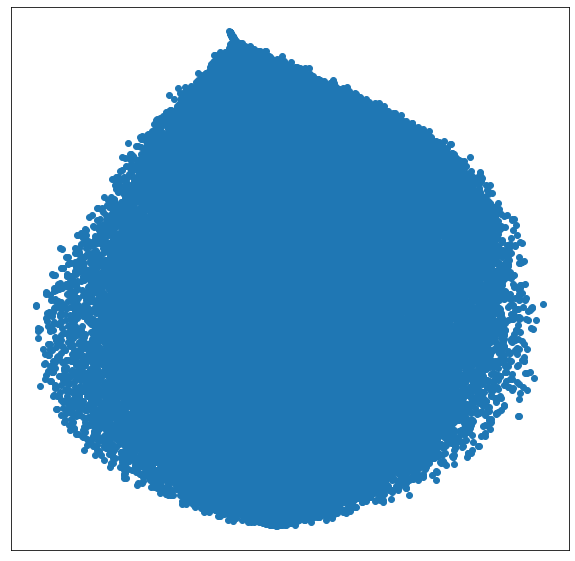

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(item_tsne[:, 0], item_tsne[:, 1]);
plt.xticks(()); plt.yticks(());
plt.show()

In [85]:
model.save('merged_2_embedding_ids_only.h5')
item_embeddings.shape

(62990, 100)

In [296]:
user_embeddings.shape

(192403, 100)

In [86]:
pd.DataFrame(user_embeddings).to_pickle("../data/user_embeddings_ids_only.pkl")
pd.DataFrame(item_embeddings).to_pickle("../data/product_embeddings_ids_only.pkl")

In [87]:
#load collaborative product embeddings
prod_embeddings = pd.read_pickle("../data/product_embeddings_ids_only.pkl")

In [90]:
#merge in index
products_clean['idx'] = products_clean.asin.apply(lambda x: prod2idx_df.loc[x])

In [254]:
products_clean.head()

,asin,description,title,category2_t,category3_t,category4_t,category5_t,category6_t,hasDescription,price_t,...,numberQuestions,numberReviews,meanStarRating,star1Rating,star2Rating,star3Rating,star4Rating,star5Rating,electronicsRankBin,idx
0,0528881469,"Like its award-winning predecessor, the Intell...",Rand McNally 528881469 7-inch Intelliroute TND...,GPS & Navigation,Vehicle GPS,Trucking GPS,Unknown,Unknown,1,299.99,...,0,5.0,2.400000,0.400000,0.200000,0.200000,0.000000,0.200000,Unknown,0
1,0594451647,HDTV Adapter Kit for NOOK HD and NOOK HD+\nThi...,Barnes &amp; Noble HDTV Adapter Kit for NOOK H...,Computers & Accessories,Touch Screen Tablet Accessories,Chargers & Adapters,Unknown,Unknown,1,49.95,...,0,5.0,4.200000,0.000000,0.200000,0.000000,0.200000,0.600000,Unknown,47
2,0594481813,Power up your device with this Barnes &amp; No...,Barnes &amp; Noble OV/HB-ADP Universal Power Kit,eBook Readers & Accessories,Power Adapters,Unknown,Unknown,Unknown,1,19.65,...,0,8.0,4.000000,0.000000,0.000000,0.375000,0.250000,0.375000,Unknown,116
3,0972683275,The VideoSecu TV mount is a mounting solution ...,VideoSecu 24&quot; Long Arm TV Wall Mount Low ...,Accessories & Supplies,Audio & Video Accessories,TV Accessories & Parts,TV Ceiling & Wall Mounts,Unknown,1,29.99,...,10,219.0,4.461187,0.027397,0.013699,0.082192,0.223744,0.652968,Unknown,261
4,1400532620,Barnes & Noble Nook eReader - no 3GMeet nook. ...,Barnes &amp; Noble Nook eReader - no 3G,eBook Readers & Accessories,Unknown,Unknown,Unknown,Unknown,1,74.95,...,5,41.0,3.609756,0.219512,0.048780,0.048780,0.268293,0.414634,50thPercentile,3206


In [287]:
products_clean.set_index('idx', inplace=True)

In [292]:
products_clean.to_pickle("../data/products_clean_idx.pkl")